In [3]:
library(Seurat)
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
library(httr)
library(jsonlite)
library(hash)
library(readr)
library(purrr)
library(RColorBrewer)  # For color palettes
library(DESeq2)
library("scales")
library(ggpubr)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


hash-2.2.6.3 provided by Decision P

In [4]:
myeloid <- readRDS("myeloid.rds")

In [5]:

convert_human_to_mouse <- function(gene_list, file_path = "HOM_MouseHumanSequence.rpt") {
    output = c()
    
    # Check if the file already exists
    if (!file.exists(file_path)) {
        # Download the mouse-human gene mapping file from the JAX website
        download.file("https://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt", file_path)
    }
    
    # Load the mouse-human gene mapping file
    mouse_human_genes = read.csv(file_path, sep = "\t")
    
    # Loop through each gene in the provided gene list
    for (gene in gene_list) {
        # Get the class key for the human gene
        class_key = (mouse_human_genes %>% filter(Symbol == gene & Common.Organism.Name == "human"))[['DB.Class.Key']]
        
        # If a valid class key is found, get the corresponding mouse genes
        if (!identical(class_key, integer(0))) {
            mouse_genes = (mouse_human_genes %>% filter(DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"))[,"Symbol"]
            
            # Add each mouse gene to the output list
            for (mouse_gene in mouse_genes) {
                output = rbind(c(gene, mouse_gene), output)
            }
        }
    }
    return (output)
}

mye_sigs = read.csv("~/Durva/myeloid/myeloid.signature.csv")
DefaultAssay(myeloid) <- "RNA"
for(i in 1:ncol(mye_sigs)) {      
    tryCatch({
        # Extract and clean the signature list
        sigs = list(mye_sigs[[i]])
        sigs2 = sigs[[1]]
        sigs = sigs2[!is.na(sigs2)]
        
        # Print the column name
        print(colnames(mye_sigs[i])[1])
        
        # Attempt conversion and module score addition
        converted_genes <- convert_human_to_mouse(sigs)
        print(list(converted_genes))
        
        # Add module score with converted genes
        myeloid <- AddModuleScore(myeloid,
                                  features = list(converted_genes[,2]),
                                  name = colnames(mye_sigs[i])[1])
    }, error = function(e) {
        # Ignore any errors by printing a simple message
        message("An error occurred and was ignored.")
    })
}


[1] "cDC1"
[[1]]
     [,1]       [,2]    
[1,] "TRBV11-3" "Trbv14"
[2,] "WFDC21P"  "Wfdc21"
[3,] "CPVL"     "Cpvl"  
[4,] "ENPP1"    "Enpp1" 
[5,] "CLNK"     "Clnk"  
[6,] "CLEC9A"   "Clec9a"



Warning message:
“The following features are not present in the object: Trbv14, not searching for symbol synonyms”


[1] "DC2"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
     [,1]       [,2]      
[1,] "IL22RA2"  "Il22ra2" 
[2,] "CLEC10A"  "Clec10a" 
[3,] "JAML"     "Jaml"    
[4,] "TRBV10-2" "Trbv13-2"
[5,] "TRBV10-2" "Trbv13-3"
[6,] "TRBV10-2" "Trbv13-1"
[7,] "PRDM16"   "Prdm16"  



Warning message:
“The following features are not present in the object: Il22ra2, Trbv13-2, Trbv13-3, Trbv13-1, not searching for symbol synonyms”


[1] "Cycling.Myleoid"
[[1]]
     [,1]    [,2]   
[1,] "ITGAM" "Itgam"
[2,] "CENPF" "Cenpf"
[3,] "CDCA8" "Cdca8"

[1] "DC3"
[[1]]
     [,1]     [,2]    
[1,] "FCN1"   "Fcnb"  
[2,] "CMA1"   "Cma1"  
[3,] "FCER1A" "Fcer1a"
[4,] "SAMSN1" "Samsn1"
[5,] "LAMP3"  "Lamp3" 
[6,] "CD274"  "Cd274" 



Warning message:
“The following features are not present in the object: Fcnb, Fcer1a, not searching for symbol synonyms”


[1] "Developing.granulocytes.neutrophils"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
      [,1]      [,2]    
 [1,] "LYZ"     "Lyz3"  
 [2,] "LYZ"     "Lyz2"  
 [3,] "DEFA1"   "Defa26"
 [4,] "FCGR1A"  "Fcgr1" 
 [5,] "CD24"    "Cd24a" 
 [6,] "JAML"    "Jaml"  
 [7,] "CEACAM8" "Psg20" 
 [8,] "FCGR3A"  "Fcgr4" 
 [9,] "CD63"    "Cd63"  
[10,] "NAMPT"   "Nampt" 
[11,] "CAMK1D"  "Camk1d"
[12,] "ITGAX"   "Itgax" 



Warning message:
“The following features are not present in the object: Lyz3, Defa26, not searching for symbol synonyms”


[1] "Macrophage.1"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
      [,1]    [,2]   
 [1,] "CD86"  "Cd86" 
 [2,] "CD80"  "Cd80" 
 [3,] "TLR4"  "Tlr4" 
 [4,] "TLR2"  "Tlr2" 
 [5,] "NOS2"  "Nos2" 
 [6,] "IL6"   "Il6"  
 [7,] "IL1B"  "Il1b" 
 [8,] "IL1A"  "Il1a" 
 [9,] "IFI44" "Ifi44"
[10,] "MX2"   "Mx1"  
[11,] "MX1"   "Mx1"  
[12,] "GBP5"  "Gbp5" 
[13,] "GBP1"  "Gbp2b"
[14,] "GBP1"  "Gbp2" 
[15,] "STAT1" "Stat1"



Warning message:
“The following features are not present in the object: Mx1, not searching for symbol synonyms”


[1] "Macrophage.2"
[[1]]
      [,1]      [,2]     
 [1,] "CD163"   "Cd163"  
 [2,] "ARG1"    "Arg1"   
 [3,] "PPARG"   "Pparg"  
 [4,] "DENND4C" "Dennd4c"
 [5,] "FBP1"    "Fbp1"   
 [6,] "LTA4H"   "Lta4h"  
 [7,] "ANO5"    "Ano5"   
 [8,] "PPARG"   "Pparg"  
 [9,] "CYP27A1" "Cyp27a1"
[10,] "MARCO"   "Marco"  
[11,] "MERTK"   "Mertk"  
[12,] "CD163"   "Cd163"  



Warning message:
“The following features are not present in the object: Fbp1, Marco, not searching for symbol synonyms”


[1] "Mast.cells"
[[1]]
     [,1]     [,2]    
[1,] "FCER2"  "Fcer2a"
[2,] "MS4A2"  "Ms4a2" 
[3,] "IL18R1" "Il18r1"
[4,] "KIT"    "Kit"   
[5,] "GATA2"  "Gata2" 
[6,] "PBX1"   "Pbx1"  

[1] "Microglia"
[[1]]
     [,1]     [,2]    
[1,] "NCK2"   "Nck2"  
[2,] "SLC2A5" "Slc2a5"
[3,] "NAV3"   "Nav3"  
[4,] "P2RY12" "P2ry12"

[1] "Monocytes.MDM"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is n

[[1]]
      [,1]       [,2]       
 [1,] "SERPINA1" "Serpina1d"
 [2,] "SERPINA1" "Serpina1a"
 [3,] "LYZ"      "Lyz3"     
 [4,] "LYZ"      "Lyz2"     
 [5,] "FCN1"     "Fcnb"     
 [6,] "FCGR3A"   "Fcgr4"    
 [7,] "MS4A6A"   "Ms4a6b"   
 [8,] "HLA-DRA"  "H2-Ea"    
 [9,] "OAS1"     "Oas1a"    
[10,] "GBP1"     "Gbp2b"    
[11,] "GBP1"     "Gbp2"     
[12,] "FCGR1A"   "Fcgr1"    
[13,] "FCGR3B"   "Fcgr4"    
[14,] "CD14"     "Cd14"     
[15,] "LYZ"      "Lyz3"     
[16,] "LYZ"      "Lyz2"     
[17,] "VIM"      "Vim"      
[18,] "FCN1"     "Fcnb"     
[19,] "VCAN"     "Vcan"     



Warning message:
“The following features are not present in the object: Serpina1d, Serpina1a, Lyz3, Fcnb, H2-Ea, not searching for symbol synonyms”


[1] "Langerhans.like.cells"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is n

[[1]]
      [,1]       [,2]     
 [1,] "HIP1"     "Hip1"   
 [2,] "CLDN1"    "Cldn1"  
 [3,] "CD207"    "Cd207"  
 [4,] "FCGR2A"   "Fcgr3"  
 [5,] "HLA-DRB5" "H2-Eb2" 
 [6,] "HLA-DRB1" "H2-Eb2" 
 [7,] "HLA-DRA"  "H2-Ea"  
 [8,] "HLA-DQB2" "H2-Ab1" 
 [9,] "HLA-DQB1" "H2-Ab1" 
[10,] "HLA-DQA2" "H2-Aa"  
[11,] "HLA-DQA1" "H2-Aa"  
[12,] "HLA-DMB"  "H2-DMb1"
[13,] "HLA-DMA"  "H2-DMa" 
[14,] "FCGR1A"   "Fcgr1"  



Warning message:
“The following features are not present in the object: Cd207, H2-Ea, not searching for symbol synonyms”


[1] "Myeloid.derived.suppressor.cells"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
     [,1]      [,2]   
[1,] "FCGR3A"  "Fcgr4"
[2,] "CD1D"    "Cd1d2"
[3,] "CD1D"    "Cd1d1"
[4,] "IL4R"    "Il4ra"
[5,] "CEACAM8" "Psg20"



Warning message:
“The following features are not present in the object: Cd1d2, not searching for symbol synonyms”


[1] "Dendritic.cells"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is n

[[1]]
      [,1]       [,2]       
 [1,] "HLA-DRB5" "H2-Eb2"   
 [2,] "HLA-C"    "H2-Q2"    
 [3,] "HLA-C"    "H2-M1"    
 [4,] "HLA-C"    "H2-M10.5" 
 [5,] "HLA-B"    "H2-Q2"    
 [6,] "HLA-B"    "H2-M1"    
 [7,] "HLA-B"    "H2-M10.5" 
 [8,] "LYZ"      "Lyz3"     
 [9,] "LYZ"      "Lyz2"     
[10,] "SIGLEC6"  "Cd33"     
[11,] "SERPINA1" "Serpina1d"
[12,] "SERPINA1" "Serpina1a"
[13,] "FTL"      "Ftl1-ps2" 
[14,] "FCGR3A"   "Fcgr4"    
[15,] "LILRB2"   "Pirb"     
[16,] "HLA-DRB1" "H2-Eb2"   
[17,] "HLA-DQB1" "H2-Ab1"   
[18,] "HLA-DMA"  "H2-DMa"   
[19,] "HLA-DMB"  "H2-DMb1"  
[20,] "HLA-DQA1" "H2-Aa"    
[21,] "HLA-DRA"  "H2-Ea"    
[22,] "CD209"    "Cd209e"   
[23,] "CD209"    "Cd209a"   



Warning message:
“The following features are not present in the object: H2-M1, H2-M10.5, Lyz3, Serpina1d, Serpina1a, Ftl1-ps2, H2-Ea, Cd209e, not searching for symbol synonyms”


[1] "Migratory.DC"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
     [,1]       [,2]      
[1,] "FCGR2C"   "Fcgr2b"  
[2,] "TRBV10-2" "Trbv13-2"
[3,] "TRBV10-2" "Trbv13-3"
[4,] "TRBV10-2" "Trbv13-1"
[5,] "ENTHD1"   "Enthd1"  



Warning message:
“The following features are not present in the object: Trbv13-2, Trbv13-3, Trbv13-1, not searching for symbol synonyms”


[1] "Transitional.DC"
[[1]]
     [,1]    [,2]   
[1,] "FOXH1" "Foxh1"
[2,] "SYCP1" "Sycp1"
[3,] "SCT"   "Sct"  



Warning message:
“The following features are not present in the object: Foxh1, Sct, not searching for symbol synonyms”


[1] "DC.precursor"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
     [,1]       [,2]      
[1,] "ANKRD34B" "Ankrd34b"
[2,] "RNASE2"   "Ear4"    
[3,] "PCLAF"    "Pclaf"   



Warning message:
“The following features are not present in the object: Ankrd34b, Ear4, not searching for symbol synonyms”


[1] "Granulocytes"
[[1]]
     [,1]       [,2]     
[1,] "ADCYAP1"  "Adcyap1"
[2,] "TRBV11-3" "Trbv14" 



Warning message:
“The following features are not present in the object: Adcyap1, Trbv14, not searching for symbol synonyms”
Warning message in AddModuleScore(myeloid, features = list(converted_genes[, 2]), :
“Could not find enough features in the object from the following feature lists:  Attempting to match case...”
An error occurred and was ignored.



[1] "Neutrophils"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
     [,1]   [,2]  
[1,] "XCR1" "Xcr1"
[2,] "SYN3" "Syn3"



Warning message:
“The following features are not present in the object: Xcr1, not searching for symbol synonyms”


[1] "Neutrophil.myeloid.progenitor"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
     [,1]       [,2]      
[1,] "KCNE5"    "Kcne5"   
[2,] "FMO2"     "Fmo2"    
[3,] "TRBV10-1" "Trbv13-2"
[4,] "TRBV10-1" "Trbv13-3"
[5,] "TRBV10-1" "Trbv13-1"
[6,] "MPO"      "Mpo"     
[7,] "MS4A3"    "Ms4a3"   



Warning message:
“The following features are not present in the object: Kcne5, Trbv13-2, Trbv13-3, Trbv13-1, Mpo, Ms4a3, not searching for symbol synonyms”


[1] "Intermediate.macrophages"


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”


[[1]]
     [,1]     [,2]    
[1,] "IL22"   "Il22"  
[2,] "TCL1B"  "Tcl1b3"
[3,] "OR2A25" "Or2a25"
[4,] "IGHE"   "Ighe"  



Warning message:
“The following features are not present in the object: Il22, Tcl1b3, Or2a25, Ighe, not searching for symbol synonyms”
Warning message in AddModuleScore(myeloid, features = list(converted_genes[, 2]), :
“Could not find enough features in the object from the following feature lists:  Attempting to match case...”
An error occurred and was ignored.



In [6]:
myeloid@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,predicted_doublets,doublet_scores,nCount_SCT,⋯,Microglia1,Monocytes.MDM1,Langerhans.like.cells1,Myeloid.derived.suppressor.cells1,Dendritic.cells1,Migratory.DC1,Transitional.DC1,DC.precursor1,Neutrophils1,Neutrophil.myeloid.progenitor1
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LAC12_ACCGTAAAGTACGTAA-1,LAC12,6494,2517,0,0,0,0,FALSE,0.02810377,2799,⋯,-0.14369521,-0.406798707,-0.026631350,-0.3025970,-7.294422e-05,0.70284259,0,-0.03728472,-0.02796354,-0.03728472
LAC12_TTCTCCTCAGGGCATA-1,LAC12,5595,2568,0,0,0,0,FALSE,0.03333529,2909,⋯,-0.14902892,-0.393116869,-0.224958613,0.2120622,-2.157734e-01,0.46963050,0,-0.03900486,-0.04595755,-0.03900486
LAC12_GCACTCTGTTCCACGG-1,LAC12,4233,2061,0,0,0,0,FALSE,0.04339960,2735,⋯,-0.14040337,-0.108826914,-0.332458814,-0.2514147,-3.611696e-01,0.38099531,0,0.00000000,-0.02425305,0.00000000
LAC12_GATGCTAGTGGTGTAG-1,LAC12,3620,1842,0,0,0,0,FALSE,0.02810377,2702,⋯,-0.10464823,-0.122052781,-0.163025308,-0.2435260,-1.089884e-01,-0.05755275,0,-0.01325065,0.00000000,-0.01325065
LAC12_TCGTACCGTCTAGTGT-1,LAC12,3295,1907,0,0,0,0,FALSE,0.09446709,2726,⋯,-0.13738502,-0.145968079,-0.422241675,0.1455985,-3.393567e-01,-0.65335975,0,-0.02789964,-0.03350814,-0.02789964
LAC12_AGCTCTCTCAGCTCTC-1,LAC12,3047,1714,0,0,0,0,FALSE,0.02087067,2634,⋯,0.22436129,0.251525218,0.170700260,0.3430960,2.466578e-02,0.44041974,0,-0.02908801,-0.05817603,-0.02908801
LAC12_CCGTTCAGTCTCATCC-1,LAC12,3092,1677,0,0,0,0,FALSE,0.01999219,2621,⋯,-0.12062887,-0.017759809,0.008281392,0.3466138,-1.203295e-01,-0.69266424,0,0.00000000,-0.01443183,0.00000000
LAC12_CGGACTGGTTCTGAAC-1,LAC12,3027,1702,0,0,0,0,FALSE,0.03634943,2637,⋯,0.24463495,-0.202997900,-0.433108653,-0.2723755,-4.321735e-01,0.40271800,0,-0.02918904,-0.03488548,-0.02918904
LAC12_TCTGGAACAAGGGTCA-1,LAC12,3029,1550,0,0,0,0,FALSE,0.01605107,2593,⋯,-0.13984871,-0.291306551,0.052518346,-0.1620392,-4.247701e-01,0.09697778,0,0.00000000,0.00000000,0.00000000


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x

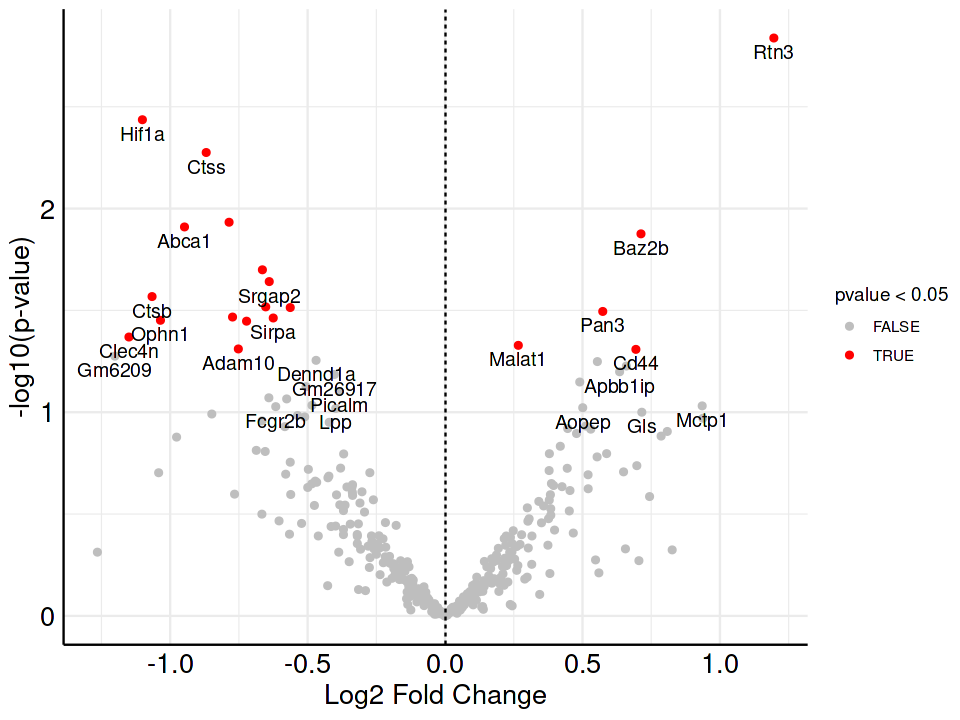

In [11]:
# Set Default Assay
DefaultAssay(myeloid) <- "RNA"

# Extract avAFM data and convert it into a vector
lcv_data <- as.vector(unlist(myeloid@meta.data$AvAFM))

# Calculate quartiles and create a factor variable 'm_cell_quartile' for each sample separately
quartile_breaks <- myeloid@meta.data %>%
    group_by(orig.ident) %>%
    mutate(m_cell_quartile = cut(AvAFM,
                                 breaks = quantile(AvAFM, probs = c(0, 0.25, 0.50, 0.75, 1), na.rm = TRUE),
                                 include.lowest = TRUE,
                                 labels = c("Q1 (Low AFM)", "Q2", "Q3", "Q4 (High AFM)")))

# Add the quartile-based grouping back to metadata
myeloid@meta.data$m_cell_quartile <- unlist(quartile_breaks$m_cell_quartile)

# Prepare DESeqDataSet with the design including both orig.ident and m_cell_quartile
dds_unfilt <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts,
                              colData = myeloid@meta.data,
                              design = ~ orig.ident + m_cell_quartile)

# Filter out low counts
#keep <- rowSums(counts(dds) >= 5) >= 5, -0.19147503, 0.07304503
param_1 = 5
param_2 = 5


keep <- rowSums(counts(dds_unfilt) >= param_1) >= param_2
dds <- dds_unfilt[keep,]

# Estimate size factors and run DESeq
dds <- estimateSizeFactors(dds, type='poscounts')
dds <- DESeq(dds)

# Get results for a specific quartile comparison, for example, Q4 (High AFM) vs Q1 (Low AFM)
results_data <- as.data.frame(results(dds, contrast = c("m_cell_quartile", "Q4 (High AFM)", "Q1 (Low AFM)")))

# Prepare data for plotting
results_data$gene <- rownames(results_data)
results_data$logp <- -log10(results_data$pvalue)

# Generate volcano plot

options(repr.plot.width = 8, repr.plot.height = 6)  # Adjust width and height as needed

# Generate volcano plot
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    geom_text(data = subset(results_data, pvalue < 0.10), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 4, check_overlap = TRUE) + # increased text size
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") + # vertical line at x = 0
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),    # increased font size for axis labels
        axis.line = element_line(color = "black")                # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)

GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_f <- GOI$gene

myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_quart_samp")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_r <- GOI$gene


In [20]:
genes_f

[1] "Baz2b"  "Cd44"   "Pan3"   "Malat1" "Rtn3"

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is n

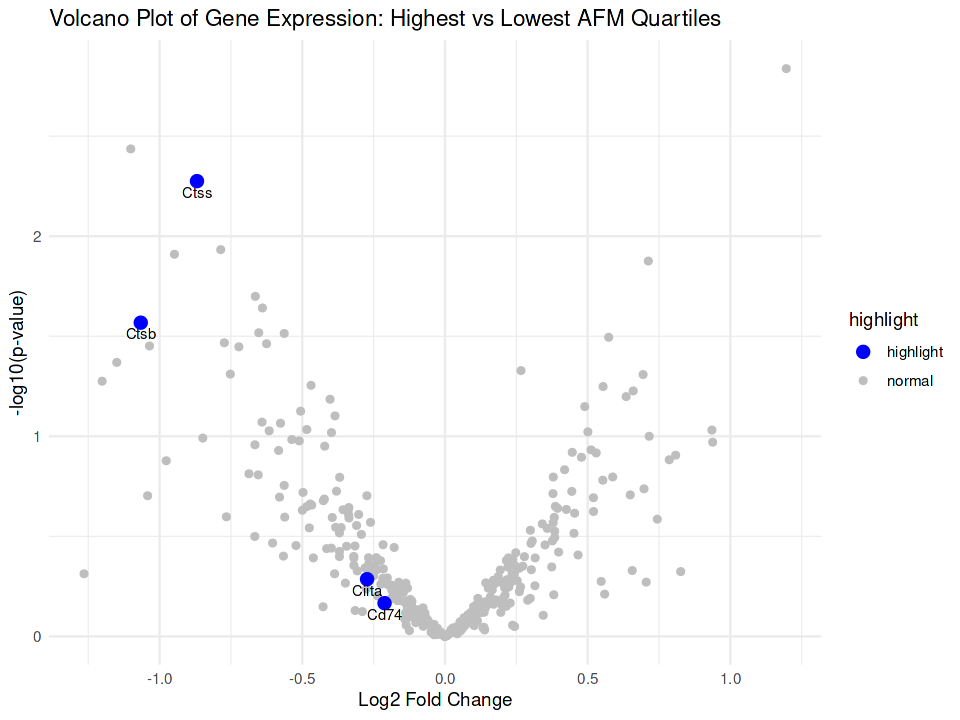

In [14]:
# Assuming you have a dataframe `expr_data` containing gene expression data
# and a column in your metadata for the grouping (e.g., "m_cell_quartile")
# Genes related to antigen presentation
antigen_presentation_genes <- c("HLA-A", "HLA-B", "HLA-C", "TAP1", "TAP2", "CIITA", "PSMB8", "PSMB9", "CD74", 
                                "HLA-E", "HLA-G", "HLA-F", "CD1A", "CD1B", "CD1C", "CD1D", "CD1E",
                                "LAMP1", "LAMP2", "CTSS", "CTSB", "CTSD", "CD40", "CD83", "CD209")

# Extended list of genes related to MHC Class I (MHCI) pathway
mhcI_genes <- c("HLA-A", "HLA-B", "HLA-C", "B2M", "TAP1", "TAP2", "TAPBP", "PSMB8", "PSMB9", 
                "ERAP1", "ERAP2", "LMP2", "LMP7", "HLA-E", "HLA-F", "HLA-G", 
                "SEC61A1", "CALR", "CANX", "PDIA3", "UBQLN1", "UBQLN2")



# List of specific genes to highlight
highlight_genes <- convert_human_to_mouse(c(antigen_presentation_genes,mhcI_genes))[,2] # replace or add more genes as needed

# Flag genes in the results data to identify those for highlighting
results_data$highlight <- ifelse(results_data$gene %in% highlight_genes, "highlight", "normal")

# Create updated volcano plot with labeled and highlighted genes
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = -log10(pvalue))) +
    geom_point(aes(color = highlight, size = highlight)) +
    scale_color_manual(values = c("normal" = "grey", "highlight" = "blue")) + # "blue" for highlighted genes
    scale_size_manual(values = c("normal" = 1.5, "highlight" = 3)) + # Increase size for highlighted genes
    geom_text(data = subset(results_data, highlight == "highlight"), 
              aes(label = gene), vjust = 1.5, hjust = 0.5, size = 3, check_overlap = TRUE) +
    theme_minimal() +
    labs(title = "Volcano Plot of Gene Expression: Highest vs Lowest AFM Quartiles", 
         x = "Log2 Fold Change", 
         y = "-log10(p-value)")

# Print the updated plot
print(volcano_plot)



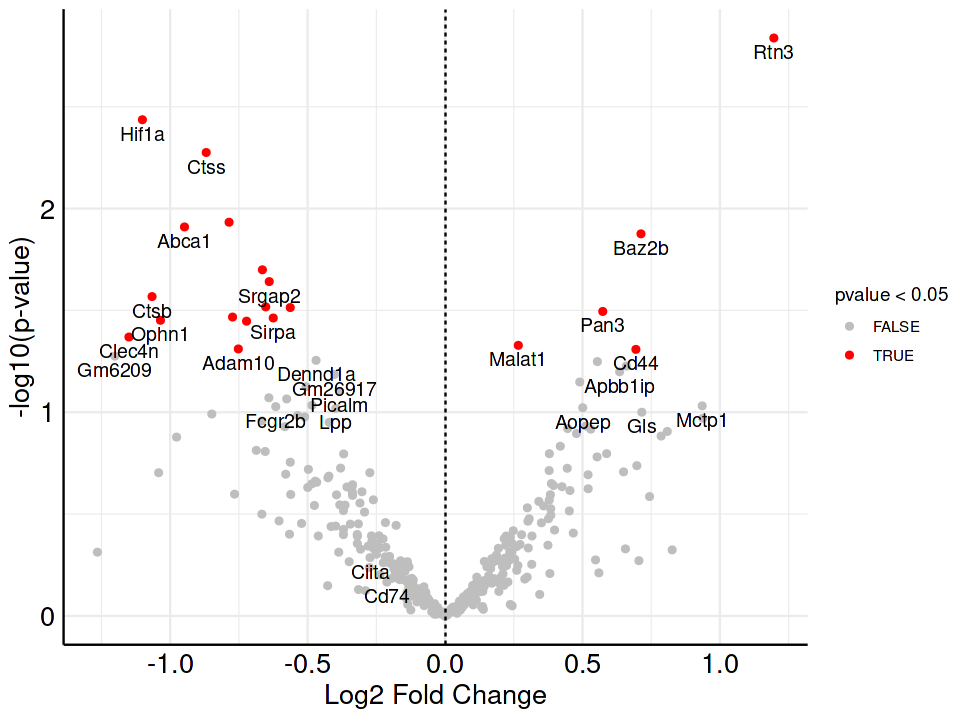

In [15]:
# Generate volcano plot with additional labels for Ct74 and Ciita
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    # Label genes with p-value < 0.10 and also Ct74 and Ciita
    geom_text(data = subset(results_data, pvalue < 0.10 | gene %in% c("Cd74", "Ciita")), 
              aes(label = gene), vjust = 1.5, hjust = 0.5, size = 4, check_overlap = TRUE) +
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") + # vertical line at x = 0
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),   # increased font size for axis labels
        axis.line = element_line(color = "black")               # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)


In [10]:
convert_human_to_mouse(c(antigen_presentation_genes,mhcI_genes))

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse, laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is n

UBQLN2,Ubqln2
UBQLN1,Ubqln1
PDIA3,Pdia3
CANX,Canx
CALR,Calr
SEC61A1,Sec61a1
HLA-G,H2-M10.2
HLA-F,H2-M10.4
HLA-E,H2-T3
HLA-E,H2-M1
ERAP1,Erap1


In [30]:
convert_mouse_to_human <- function(gene_list, file_path = "HOM_MouseHumanSequence.rpt") {
    output = c()
    
    # Check if the file already exists
    if (!file.exists(file_path)) {
        # Download the mouse-human gene mapping file from the JAX website
        download.file("https://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt", file_path)
    }
    
    # Load the mouse-human gene mapping file
    mouse_human_genes = read.csv(file_path, sep = "\t")
    
    # Loop through each gene in the provided mouse gene list
    for (gene in gene_list) {
        # Get the class key for the mouse gene
        class_key = (mouse_human_genes %>% filter(Symbol == gene & Common.Organism.Name == "mouse, laboratory"))[['DB.Class.Key']]
        
        # If a valid class key is found, get the corresponding human genes
        if (!identical(class_key, integer(0))) {
            human_genes = (mouse_human_genes %>% filter(DB.Class.Key == class_key & Common.Organism.Name == "human"))[,"Symbol"]
            
            # Add each human gene to the output list
            for (human_gene in human_genes) {
                output = rbind(c(gene, human_gene), output)
            }
        }
    }
    return (output)
}

convert_mouse_to_human(genes_f)[,2]


[1] "RTN3"   "MALAT1" "PAN3"   "CD44"   "BAZ2B"

[1] "OPHN1"    "RFTN1"    "CTSB"     "TGFBI"    "HIF1A"    "PPM1H"   
 [7] "ADAM10"   "MEF2A"    "CLEC6A"   "TMCC1"    "ARHGAP24" "ABCA1"   
[13] "CTSS"     "SIRPA"    "SRGAP2C"  "SRGAP2B"  "SRGAP2"

In [36]:
GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.25)
genes_f <- GOI$gene

myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_quart_samp")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.25)
genes_r <- GOI$gene


genes <- convert_mouse_to_human(genes_f)[,2]

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go
print(mut_enr$Term)
mut_enr <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore > 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1


Sys.sleep(3)

genes <- convert_mouse_to_human(genes_r)[,2]


# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go
mut_enr <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore > 1)
print(mut_enr_go$Term)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]



                              

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
  [1] "Positive Regulation Of Leukocyte Cell-Cell Adhesion (GO:1903039)"                                                                      
  [2] "MHC Class II Protein Complex Assembly (GO:0002399)"                                                                                    
  [3] "Peptide Antigen Assembly With MHC Class II Protein Complex (GO:0002503)"                                                               
  [4] "Peptide Antigen Assembly With MHC Protein Complex (GO:0002501)"                                                                        
  [5] "Immunoglobulin Production Involved In Immunoglobulin-Mediated Immune Response (GO:0002381)"                                            
  [6] "Antigen Processing And Presentation Of Exogenous Peptide Antigen Via MHC Class II (GO:0019886)"                                   

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
 [1] "Endocytosis (GO:0006897)"                                                                               
 [2] "Negative Regulation Of Protein Localization To Cell Periphery (GO:1904376)"                             
 [3] "Negative Regulation Of Protein Localization To Plasma Membrane (GO:1903077)"                            
 [4] "Negative Regulation Of Protein Localization To Membrane (GO:1905476)"                                   
 [5] "Response To Interleukin-1 (GO:0070555)"                                                                 
 [6] "Negative Regulation Of Endocytosis (GO:0045806)"                                                        
 [7] "Endosomal Transport (GO:0016197)"                                                                       
 [8] "Receptor-Mediated Endocytosis (GO:0006898)"                          

In [42]:
GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.25)
genes_f <- GOI$gene

myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_quart_samp")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.25)
genes_r <- GOI$gene


genes <- convert_mouse_to_human(genes_f)[,2]

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go
print(mut_enr$Term)

mut_enr_total <- mut_enr
mut_enr_filt <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore > 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1


Sys.sleep(3)

genes <- convert_mouse_to_human(genes_r)[,2]


# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- mut_enr_go

mut_enr_total_neg <- mut_enr
mut_enr_filt <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore > 1)
print(mut_enr_total_neg$Term)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]



                              

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
  [1] "Positive Regulation Of Leukocyte Cell-Cell Adhesion (GO:1903039)"                                                                      
  [2] "MHC Class II Protein Complex Assembly (GO:0002399)"                                                                                    
  [3] "Peptide Antigen Assembly With MHC Class II Protein Complex (GO:0002503)"                                                               
  [4] "Peptide Antigen Assembly With MHC Protein Complex (GO:0002501)"                                                                        
  [5] "Immunoglobulin Production Involved In Immunoglobulin-Mediated Immune Response (GO:0002381)"                                            
  [6] "Antigen Processing And Presentation Of Exogenous Peptide Antigen Via MHC Class II (GO:0019886)"                                   

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
  [1] "Endocytosis (GO:0006897)"                                                                                                                                     
  [2] "Negative Regulation Of Protein Localization To Cell Periphery (GO:1904376)"                                                                                   
  [3] "Negative Regulation Of Protein Localization To Plasma Membrane (GO:1903077)"                                                                                  
  [4] "Negative Regulation Of Protein Localization To Membrane (GO:1905476)"                                                                                         
  [5] "Response To Interleukin-1 (GO:0070555)"                                                                                                                       
  [6] "Negative Regula

In [45]:
# Group 1/2 TAMs: Promote growth, survival, structural remodeling, and nutrient support
group_1_2_paths = c(
    "Leukocyte Aggregation (GO:0070486)",
    "Positive Regulation Of Heterotypic Cell-Cell Adhesion (GO:0034116)",
    "Endoplasmic Reticulum Tubular Network Organization (GO:0071786)",
    "Wound Healing, Spreading Of Cells (GO:0044319)",
    "Positive Regulation Of Leukocyte Cell-Cell Adhesion (GO:1903039)",
    "Connective Tissue Development (GO:0061448)",
    "Positive Regulation Of Peptidyl-Serine Phosphorylation (GO:0033138)",
    "Regulation Of Cell Morphogenesis (GO:0022604)"
)

# Group 3/4 TAMs: Engage in immune responses, stress adaptation, and hypoxia management
group_3_4_paths = c(
    "Regulation Of Cytokine Production Involved In Inflammatory Response (GO:1900015)",
    "Positive Regulation Of Signal Transduction (GO:0009967)",
    "Cellular Response To Interleukin-1 (GO:0071347)",
    "Regulation Of I-kappaB Phosphorylation (GO:1903719)",
    "Intracellular Oxygen Homeostasis (GO:0032364)",
    "Positive Regulation Of Cytokine Production (GO:0001819)",
    "Regulation Of T-helper 17 Type Immune Response (GO:2000316)",
    "Toll-Like Receptor 3 Signaling Pathway (GO:0034138)"
)
all_pathways = c(group_1_2_paths,group_3_4_paths)
all_pathways

tmut_enr_total <- (mut_enr_total[mut_enr_total$Term %in% all_pathways,])
rownames(tmut_enr_total) <- tmut_enr_total$Term
tmut_enr_total <- tmut_enr_total[all_pathways,]
temp <- tmut_enr_total[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
tmut_enr_total <- tmut_enr_total[,c()]
tmut_enr_total$p.val.pos <- temp$Adjusted.P.value
tmut_enr_total$q.score.pos <- temp$qscore
rownames(tmut_enr_total) <- all_pathways
tmut_enr_total$p.val.pos <- ifelse(is.na(tmut_enr_total$p.val.pos), 1, tmut_enr_total$p.val.pos)
tmut_enr_total$q.score.pos <- ifelse(is.na(tmut_enr_total$q.score.pos), 0, tmut_enr_total$q.score.pos)

tmut_enr_total_neg <- (mut_enr_total_neg[mut_enr_total_neg$Term %in% all_pathways,])
rownames(tmut_enr_total_neg) <- tmut_enr_total_neg$Term
tmut_enr_total_neg <- tmut_enr_total_neg[all_pathways,]
temp <- tmut_enr_total_neg[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
tmut_enr_total_neg <- tmut_enr_total_neg[,c()]
tmut_enr_total_neg$p.val.neg <- temp$Adjusted.P.value
tmut_enr_total_neg$q.score.neg <- temp$qscore
rownames(tmut_enr_total_neg) <- all_pathways
# Fill p-values and q-scores with NA handling
tmut_enr_total_neg$p.val.neg <- ifelse(is.na(tmut_enr_total_neg$p.val.neg), 1, tmut_enr_total_neg$p.val.neg)
tmut_enr_total_neg$q.score.neg <- ifelse(is.na(tmut_enr_total_neg$q.score.neg), 0, tmut_enr_total_neg$q.score.neg)

tmut_enr_total_neg


tmut_enr_total_neg$q.score.neg <- rescale(tmut_enr_total_neg$q.score.neg, to=c(0,1))
tmut_enr_total$p.val.neg <- rescale(tmut_enr_total$p.val.neg, to=c(0,1))



[1] "Leukocyte Aggregation (GO:0070486)"                                              
 [2] "Positive Regulation Of Heterotypic Cell-Cell Adhesion (GO:0034116)"              
 [3] "Endoplasmic Reticulum Tubular Network Organization (GO:0071786)"                 
 [4] "Wound Healing, Spreading Of Cells (GO:0044319)"                                  
 [5] "Positive Regulation Of Leukocyte Cell-Cell Adhesion (GO:1903039)"                
 [6] "Connective Tissue Development (GO:0061448)"                                      
 [7] "Positive Regulation Of Peptidyl-Serine Phosphorylation (GO:0033138)"             
 [8] "Regulation Of Cell Morphogenesis (GO:0022604)"                                   
 [9] "Regulation Of Cytokine Production Involved In Inflammatory Response (GO:1900015)"
[10] "Positive Regulation Of Signal Transduction (GO:0009967)"                         
[11] "Cellular Response To Interleukin-1 (GO:0071347)"                                 
[12] "Regulation Of I-kappaB Phosphorylation (GO:1903719)"                             
[13] "Intracellular Oxygen Homeostasis (GO:0032364)"                                   
[14] "Positive Regulation Of Cytokine Production (GO:0001819)"                         
[15] "Regulation Of T-helper 17 Type Immune Response (GO:2000316)"                     
[16] "Toll-Like Receptor 3 Signaling Pathway (GO:0034138)"

,p.val.neg,q.score.neg
,<dbl>,<dbl>
Leukocyte Aggregation (GO:0070486),1.00000000,0.0000000
Positive Regulation Of Heterotypic Cell-Cell Adhesion (GO:0034116),1.00000000,0.0000000
Endoplasmic Reticulum Tubular Network Organization (GO:0071786),1.00000000,0.0000000
"Wound Healing, Spreading Of Cells (GO:0044319)",0.05346477,1.2719323
Positive Regulation Of Leukocyte Cell-Cell Adhesion (GO:1903039),0.18139933,0.7413643
Connective Tissue Development (GO:0061448),1.00000000,0.0000000
Positive Regulation Of Peptidyl-Serine Phosphorylation (GO:0033138),0.26113230,0.5831394
Regulation Of Cell Morphogenesis (GO:0022604),1.00000000,0.0000000
Regulation Of Cytokine Production Involved In Inflammatory Response (GO:1900015),0.09310953,1.0310059


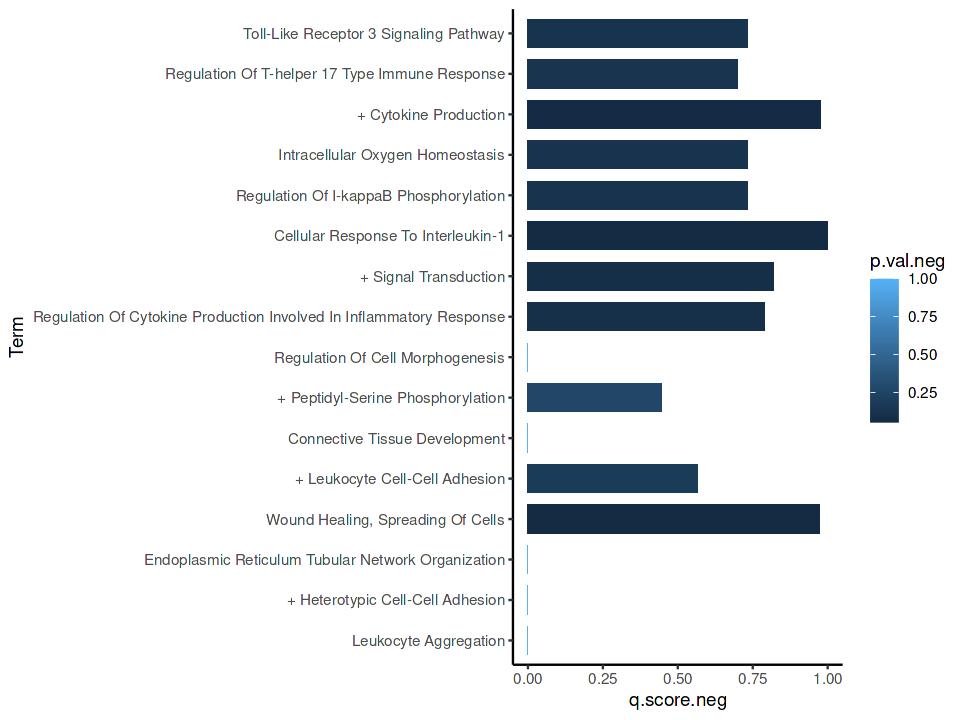

In [48]:
tmut_enr_total$Term <- rownames(tmut_enr_total)
tmut_enr_total$Term <- factor(tmut_enr_total$Term, levels = tmut_enr_total$Term)

ggplot(tmut_enr_total_neg, aes(x = Term , y =  q.score.neg, 
                                  fill=p.val.neg)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))



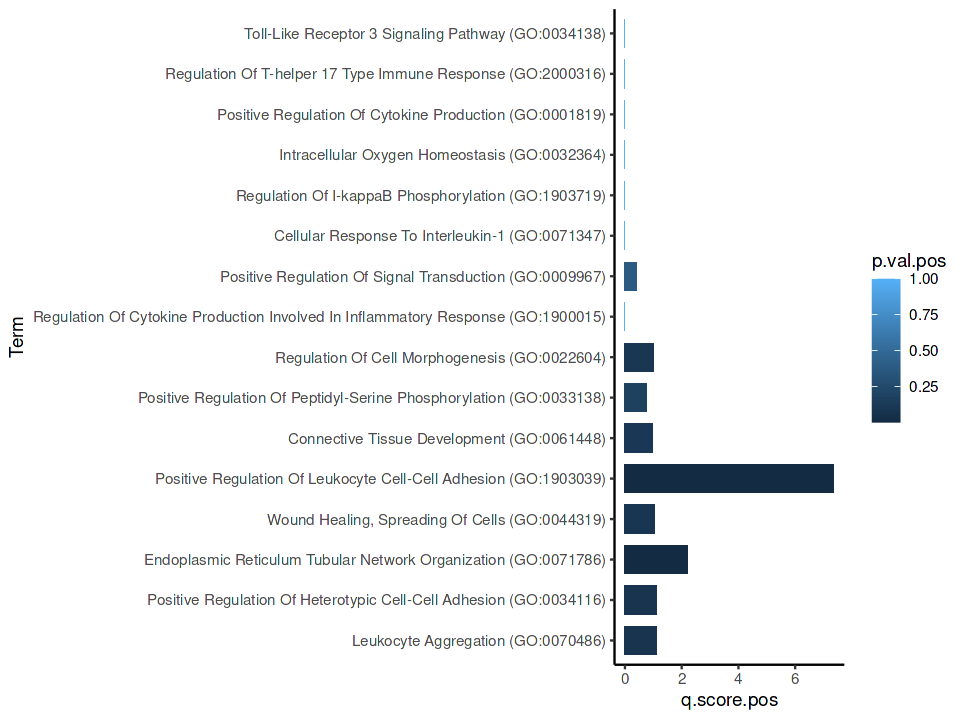

In [49]:
tmut_enr_total$Term <- rownames(tmut_enr_total)
tmut_enr_total$Term <- factor(tmut_enr_total$Term, levels = tmut_enr_total$Term)

ggplot(tmut_enr_total, aes(x = Term , y =  q.score.pos, 
                                  fill=p.val.pos)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))



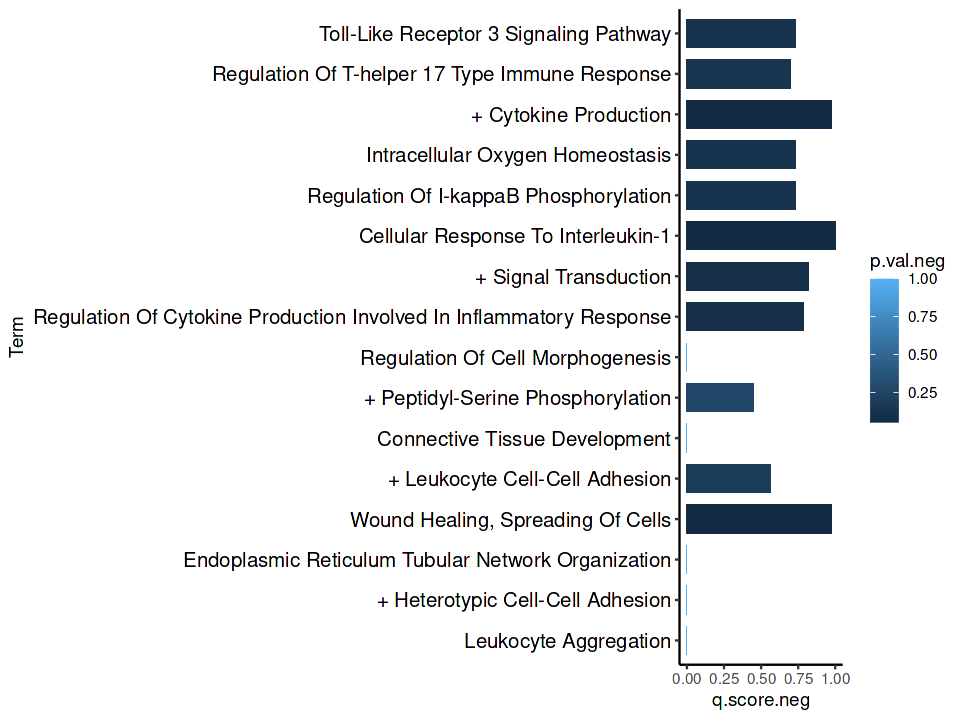

In [47]:
tmut_enr_total_neg$Term <- rownames(tmut_enr_total_neg)

tmut_enr_total_neg$Term <- gsub(" \\(GO:.*$", "", rownames(tmut_enr_total_neg))
tmut_enr_total_neg$Term <- gsub("positive regulation of ", "+ ", tmut_enr_total_neg$Term, ignore.case = TRUE)

tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)


tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)

ggplot(tmut_enr_total_neg, aes(x = Term , y =  q.score.neg, 
                                  fill=p.val.neg)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"),
           axis.text.y = element_text(size = 12, color = "black") # Increase font size for y-axis tick labels
)



In [ ]:

GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_f <- GOI$gene

myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_quart_samp")

GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_r <- GOI$gene



myeloid<- AddModuleScore(myeloid,
                          features = list(GOI$gene),
                          name="myeloid_signature_quart_samp_neg")



# Select relevant columns
columns_to_analyze <- c("myeloid_signature_quart_samp1", "myeloid_signature_quart_samp_neg1",
                        "Macrophage.11", "Macrophage.21")

# Subset the dataframe to include only these columns
myeloid_subset <- myeloid@meta.data[, columns_to_analyze]

# Compute correlation matrix
correlation_matrix <- cor(myeloid_subset, use = "complete.obs")

# Extract correlations with Macrophage.11 and Macrophage.21
cor_with_macrophage <- correlation_matrix[c("Macrophage.11", "Macrophage.21"),
                                          c("myeloid_signature_quart_samp1", "myeloid_signature_quart_samp_neg1")]

# Display the result
print(cor_with_macrophage)


In [12]:
# Select relevant columns
columns_to_analyze <- c("myeloid_signature_half_inde1", "myeloid_signature_half_inde_neg1",
                        "myeloid_signature_quart_inde1", "myeloid_signature_quart_inde_neg1",
                        "myeloid_signature_half_samp1", "myeloid_signature_half_samp_neg1",
                        "myeloid_signature_quart_samp1", "myeloid_signature_quart_samp_neg1",
                        "Macrophage.11", "Macrophage.21")

# Subset the dataframe to include only these columns
myeloid_subset <- myeloid@meta.data[, columns_to_analyze]

# Compute correlation matrix
correlation_matrix <- cor(myeloid_subset, use = "complete.obs")

# Extract correlations with Macrophage.11 and Macrophage.21
cor_with_macrophage <- correlation_matrix[c("Macrophage.11", "Macrophage.21"),
                                          c("myeloid_signature_half_inde1", "myeloid_signature_half_inde_neg1",
                                            "myeloid_signature_quart_inde1", "myeloid_signature_quart_inde_neg1",
                                            "myeloid_signature_half_samp1", "myeloid_signature_half_samp_neg1",
                                            "myeloid_signature_quart_samp1", "myeloid_signature_quart_samp_neg1")]

# Display the result
print(cor_with_macrophage)


              myeloid_signature_half_inde1 myeloid_signature_half_inde_neg1
Macrophage.11                   -0.1826041                       -0.0867328
Macrophage.21                   -0.1281923                        0.2823235
              myeloid_signature_quart_inde1 myeloid_signature_quart_inde_neg1
Macrophage.11                    0.07574018                        -0.1745272
Macrophage.21                   -0.19831338                         0.3571059
              myeloid_signature_half_samp1 myeloid_signature_half_samp_neg1
Macrophage.11                   0.03295154                     -0.012432532
Macrophage.21                  -0.05698304                      0.006923608
              myeloid_signature_quart_samp1 myeloid_signature_quart_samp_neg1
Macrophage.11                   -0.01686169                       -0.07098775
Macrophage.21                   -0.05402671                        0.21679830


In [ ]:
genes <- genes_f

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- subset(mut_enr,Adjusted.P.value	 < 0.15 & qscore > 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""


h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1
ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
print(myggp)


In [ ]:
genes <- genes_r

# Load Enrichr
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2023")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- subset(mut_enr,Adjusted.P.value	 < 0.05 & qscore >= 1)

#mut_enr<- mut_enr[order(mut_enr$Adjusted.P.value),]
mp = ""
cohort = "Cells Affillated with Highest Quartile AFM Measurements"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = ""

print(mut_enr)
h_mut_enr1 <- mut_enr[1:25,]
h_mut_enr <- h_mut_enr1
ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
print(myggp)
